In [1]:
import pandas as pd
import re
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

df1 = pd.read_csv("courses_results.csv")
df2 = pd.read_csv("df_coursera.csv")
df3 = pd.read_csv("API_stepik2.csv")
# Concatenate dataframes vertically since they share the same structure
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

In [2]:
# Validate the merge by checking the shape and a sample of the data
print("Merged DataFrame shape:", merged_df.shape)
merged_df

Merged DataFrame shape: (11675, 10)


,url,course_name,rating,survey_count,Institution,Subject,Level,Associated_skills,price,duration
0,https://www.edx.org/learn/architecture-history...,MITx: A Global History of Architecture,4.9,8,MITx,History,Introductory,Architectural History,149,13 weeks
1,https://www.edx.org/learn/architecture-history...,TsinghuaX: History of Chinese Architecture | 中...,NaN,NaN,TsinghuaX,Humanities,Introductory,"Aesthetics, Architectural History, Crystalliza...",NaN,16 weeks
2,https://www.edx.org/learn/architecture/harvard...,HarvardX: The Architectural Imagination,4.7,144,HarvardX,Architecture,Introductory,"Imagination, Innovation, Perspective (Graphica...",249,10 weeks
3,https://www.edx.org/learn/design/delft-univers...,DelftX: AI in Architectural Design: Introduction,NaN,NaN,DelftX,Design,Introductory,"Architectural Design, Artificial Intelligence,...",109,8 weeks
4,https://www.edx.org/learn/computer-architectur...,ArmEducationX: Computer Architecture Essential...,4.3,10,ArmEducationX,Computer Science,Intermediate,NaN,99,6 weeks
...,...,...,...,...,...,...,...,...,...,...
11670,https://stepik.org/course/122670/,Derivatives: instructions for use,5.0,4 отзыва,NaN,NaN,easy,"['The concept of a derivative', 'Table of deri...",1900.0,NaN
11671,https://stepik.org/course/122678/,Integrals: instructions for use,5.0,3 отзыва,NaN,NaN,easy,"['The concept of integral', 'Integration table...",1900.0,NaN
11672,https://stepik.org/course/122684/,Matrices. Determinants. Systems of linear equa...,4.9,8 отзывов,NaN,NaN,easy,"['Matrices', 'Appointers', 'The method', 'Gaus...",1900.0,NaN
11673,https://stepik.org/course/122928/,Social studies in 10 days. USE - 2024,5.0,3 отзыва,NaN,NaN,NaN,['The most important thing you learn after thi...,10000.0,NaN


In [3]:
merged_df.sample(5)

,url,course_name,rating,survey_count,Institution,Subject,Level,Associated_skills,price,duration
7745,https://www.coursera.org/learn/learn-to-program,Learn to Program: The Fundamentals,4.7,6.6K reviews,University of Toronto,NaN,Beginner,"Skills you'll gain: Programming Principles, De...",NaN,1 - 3 Months
2124,https://www.edx.org/learn/5g/the-linux-foundat...,LinuxFoundationX: Business Considerations for ...,4.1,28,LinuxFoundationX,Business & Management,Introductory,"5G Technology, Artificial Intelligence, Custom...",189,10 weeks
8671,https://www.coursera.org/specializations/infor...,Introduction to Cybersecurity & Risk Management,4.7,283 reviews,"University of California, Irvine",NaN,Beginner,"Skills you'll gain: Threat Modeling, Risk Mana...",NaN,1 - 3 Months
9966,https://www.coursera.org/learn/the-fundamental...,The Fundamentals of RDMA Programming,4.6,29 reviews,NVIDIA,NaN,Intermediate,Skills you'll gain: Application Programming In...,NaN,1 - 3 Months
7198,https://www.coursera.org/learn/introduction-to...,Introduction to Finance: The Basics,4.7,438 reviews,University of Illinois Urbana-Champaign,NaN,Beginner,"Skills you'll gain: Financial Statements, Fina...",NaN,1 - 3 Months


In [4]:
merged_df.drop_duplicates(inplace=True)
missing_values = merged_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
url                     0
course_name            15
rating               1854
survey_count         1854
Institution           794
Subject              5067
Level                 556
Associated_skills     694
price                4377
duration              751
dtype: int64


In [5]:
merged_df = merged_df.drop(columns=["Subject"])

In [6]:
# Drop rows where the 'course_name' column is missing
merged_df = merged_df.dropna(subset=["course_name"])

# Verify that there are no missing course names left
print("Missing course names:\n", merged_df.isnull().sum())

Missing course names:
 url                     0
course_name             0
rating               1854
survey_count         1854
Institution           779
Level                 550
Associated_skills     694
price                4376
duration              736
dtype: int64


In [7]:
merged_df = merged_df.dropna(subset=["Associated_skills"])
merged_df = merged_df.dropna(subset=["Level"])
# Replace missing values in the Institution column with "not Institution"
merged_df['Institution'] = merged_df['Institution'].fillna("not Institution")

In [8]:
# Use .loc to avoid the warning
merged_df.loc[:, "price"] = merged_df["price"].fillna(0)

# Verify that there are no missing values in the "price" column
print("Missing values in 'price':\n", merged_df.isnull().sum())

Missing values in 'price':
 url                     0
course_name             0
rating               1275
survey_count         1275
Institution             0
Level                   0
Associated_skills       0
price                   0
duration              556
dtype: int64


In [9]:
merged_df.shape

(6589, 9)

In [10]:
# Find all unique values in the 'duration' column and convert to a set
unique_durations = set(merged_df["duration"].unique())
print("Unique duration values:", unique_durations)

Unique duration values: {'20 weeks', '17 weeks', '13 weeks', '11 weeks', '1 - 3 Months', '5 weeks', '7 weeks', 'Self-paced', '8 weeks', nan, '16 weeks', '10 weeks', '3 - 6 Months', '2 weeks', '14 weeks', '36 weeks', '12 weeks', 'Less Than 2 Hours', '1 - 4 Weeks', '6 weeks', '1 weeks', '28 weeks', '4 weeks', '24 weeks', '15 weeks', '18 weeks', '9 weeks', '3 weeks'}


In [11]:
def convert_duration_to_days(duration_str):
    """
    Convert a duration string to a number of days.
    
    Examples:
      - "8 weeks" => 56 days
      - "1 - 4 Weeks" => average of 1 and 4 weeks => (1+4)/2 * 7 = 17.5 days
      - "1 year 6 months" => 365 + (6*30) = 545 days (approx)
      - "Less Than 2 Hours" => 2/24 days (approx)
      
    If the input cannot be parsed (e.g., "Self-paced"), the function returns None.
    """
    if not isinstance(duration_str, str):
        return None
    
    s = duration_str.lower().strip()
    
    # Special case for self-paced courses
    if "self-paced" in s:
        return None
    
    # Special case for durations specified in hours (e.g., "Less Than 2 Hours")
    if "less than" in s and "hour" in s:
        match = re.search(r'(\d+(?:\.\d+)?)', s)
        if match:
            hours = float(match.group(1))
            return hours / 24.0
        else:
            return None
    
    # Pattern to capture numbers and units (including possible ranges like "1 - 4")
    pattern = r'(\d+(?:\.\d+)?)(?:\s*-\s*(\d+(?:\.\d+)?))?\s*(year|month|week|hour)s?'
    matches = re.findall(pattern, s)
    
    if not matches:
        return None
    
    total_days = 0.0
    for num1, num2, unit in matches:
        # Compute the average if a range is provided
        value = (float(num1) + float(num2)) / 2.0 if num2 else float(num1)
        
        # Convert based on the unit
        if unit.startswith("year"):
            days = value * 365
        elif unit.startswith("month"):
            days = value * 30
        elif unit.startswith("week"):
            days = value * 7
        elif unit.startswith("hour"):
            days = value / 24.0
        else:
            days = 0
        
        total_days += days
    
    return total_days

In [12]:
# Update the DataFrame with the new column 'duration_days'
merged_df.loc[:, 'duration_days'] = merged_df['duration'].apply(convert_duration_to_days)

# Compute the median of the duration_days column (ignoring NaN values)
median_duration = merged_df['duration_days'].median()

# Replace the missing (NaN) values in duration_days with the median value
merged_df.loc[:, 'duration_days'] = merged_df['duration_days'].fillna(median_duration)

# Display a sample of the original and converted duration columns
print(merged_df[['duration', 'duration_days']].head())

# Drop the "duration" column
merged_df = merged_df.drop(columns=["duration"])

     duration  duration_days
0    13 weeks           91.0
1    16 weeks          112.0
2    10 weeks           70.0
3     8 weeks           56.0
5  Self-paced           56.0


In [13]:
# Identify Coursera courses and update their price
coursera_mask = merged_df["url"].str.startswith("https://www.coursera.org/", na=False)
merged_df.loc[coursera_mask, "price"] = merged_df.loc[coursera_mask, "duration_days"] * 1.633

# Identify Stepik courses and convert their price from RUB to USD
stepik_mask = merged_df["url"].str.startswith("https://stepik.org/", na=False)
merged_df.loc[stepik_mask, "price"] = merged_df.loc[stepik_mask, "price"] / 89.75

# Verify the updates
print("Updated Coursera Prices:")
print(merged_df.loc[coursera_mask, ["url", "duration_days", "price"]].head())

print("\nUpdated Stepik Prices:")
print(merged_df.loc[stepik_mask, ["url", "price"]].head())

Updated Coursera Prices:
                                                    url  duration_days  \
2781  https://www.coursera.org/professional-certific...          135.0   
2782  https://www.coursera.org/professional-certific...          135.0   
2783  https://www.coursera.org/professional-certific...          135.0   
2784  https://www.coursera.org/professional-certific...          135.0   
2785  https://www.coursera.org/professional-certific...          135.0   

        price  
2781  220.455  
2782  220.455  
2783  220.455  
2784  220.455  
2785  220.455  

Updated Stepik Prices:
                                     url      price
10675  https://stepik.org/course/216279/  16.601671
10677  https://stepik.org/course/230224/  32.311978
10678  https://stepik.org/course/214389/  27.855153
10679  https://stepik.org/course/230403/  33.314763
10680  https://stepik.org/course/211707/        0.0


In [14]:
set(merged_df["Level"].unique())

{'Advanced',
 'Beginner',
 'Intermediate',
 'Introductory',
 'Mixed',
 'easy',
 'hard',
 'normal'}

In [15]:
# Define the mapping for replacement
level_mapping = {
    'easy': 'Beginner',
    'normal': 'Intermediate',
    'hard': 'Advanced'
}

# Replace the values in the "Level" column according to the mapping
merged_df['Level'] = merged_df['Level'].replace(level_mapping)

# Print the unique values in the "Level" column to verify the replacement
print(set(merged_df["Level"].unique()))

{'Beginner', 'Advanced', 'Intermediate', 'Mixed', 'Introductory'}


In [16]:
import pandas as pd

def process_associated_skills(value):
    # Replace NaN with an empty string
    if pd.isnull(value):
        return ''
    
    # If the value is already a list, join its elements into a string (in lowercase)
    if isinstance(value, list):
        return " ".join(map(lambda x: str(x).lower(), value))
    
    # If the value is a string
    elif isinstance(value, str):
        value = value.strip().lower()  # Convert entire string to lowercase
        # Check if it represents a list (starts with "[" and ends with "]")
        if value.startswith("[") and value.endswith("]"):
            # Remove the outer brackets
            inner = value[1:-1].strip()
            # If the inner string is empty, return an empty string
            if not inner:
                return ''
            # Split by comma and remove any surrounding quotes and extra whitespace
            tokens = inner.split(',')
            tokens = [token.strip().strip("'").strip('"') for token in tokens]
            return " ".join(tokens)
        else:
            return value
    else:
        return value

# Apply the function to the "Associated_skills" column
merged_df["Associated_skills"] = merged_df["Associated_skills"].apply(process_associated_skills)

# Display a few rows to verify the changes
print(merged_df["Associated_skills"].head())


0                                architectural history
1    aesthetics, architectural history, crystalliza...
2    imagination, innovation, perspective (graphica...
3    architectural design, artificial intelligence,...
5                                        advertisement
Name: Associated_skills, dtype: object


In [17]:
def convert_survey_count(survey_str):
    """
    Convert survey_count from formatted text (e.g., '4.5K reviews') to a numeric value.
    - '4.5K reviews' → 4500
    - '30K reviews' → 30000
    - '449 reviews' → 449
    - NaN values remain unchanged
    """
    if isinstance(survey_str, str):  # Ensure it's a string before processing
        survey_str = survey_str.lower().replace("reviews", "").strip()
        match = re.match(r'([\d\.]+)k?', survey_str)  # Extract numeric part
        if match:
            num = float(match.group(1))
            if "k" in survey_str:  # If 'K' is present, multiply by 1000
                num *= 1000
            return int(num)  # Convert to integer
    return survey_str  # Return unchanged if it's not a recognized pattern

In [18]:
# Apply conversion only to Coursera courses
coursera_mask = merged_df["url"].str.startswith("https://www.coursera.org/", na=False)
merged_df.loc[coursera_mask, "survey_count"] = merged_df.loc[coursera_mask, "survey_count"].apply(convert_survey_count)

# Verify the transformation
print(merged_df.loc[coursera_mask, ["url", "survey_count"]].head(20))


                                                    url survey_count
2781  https://www.coursera.org/professional-certific...     163000.0
2782  https://www.coursera.org/professional-certific...      47000.0
2783  https://www.coursera.org/professional-certific...     124000.0
2784  https://www.coursera.org/professional-certific...      37000.0
2785  https://www.coursera.org/professional-certific...      88000.0
2786  https://www.coursera.org/professional-certific...     199000.0
2787  https://www.coursera.org/specializations/machi...      32000.0
2788  https://www.coursera.org/learn/google-ai-essen...       9200.0
2789  https://www.coursera.org/specializations/deep-...     145000.0
2790  https://www.coursera.org/professional-certific...     139000.0
2791  https://www.coursera.org/professional-certific...      88000.0
2792  https://www.coursera.org/professional-certific...      80000.0
2793     https://www.coursera.org/learn/ai-for-everyone      46000.0
2794  https://www.coursera.org/pro

In [19]:
def convert_stepik_survey_count(survey_str):
    """
    Convert survey_count from Stepik format (e.g., '4 отзыва', '1 отзыв') to a numeric value.
    - '4 отзыва' → 4
    - '1 отзыв' → 1
    - '1 000 отзывов' → 1000
    - NaN values remain unchanged
    """
    if isinstance(survey_str, str):  # Ensure it's a string before processing
        survey_str = survey_str.lower().replace("отзывов", "").replace("отзыва", "").replace("отзыв", "").strip()
        survey_str = survey_str.replace(" ", "")  # Remove spaces (e.g., '1 000' -> '1000')
        
        if survey_str.isdigit():  # Check if it's purely numeric
            return int(survey_str)
    
    return survey_str  # Return unchanged if it's not a recognized pattern
# Apply conversion only to Stepik courses
stepik_mask = merged_df["url"].str.startswith("https://stepik.org/", na=False)
merged_df.loc[stepik_mask, "survey_count"] = merged_df.loc[stepik_mask, "survey_count"].apply(convert_stepik_survey_count)

# Verify the transformation
print(merged_df.loc[stepik_mask, ["url", "survey_count"]].head(20))

                                     url survey_count
10675  https://stepik.org/course/216279/            0
10677  https://stepik.org/course/230224/            0
10678  https://stepik.org/course/214389/            0
10679  https://stepik.org/course/230403/            0
10680  https://stepik.org/course/211707/            1
10681  https://stepik.org/course/215388/            1
10682  https://stepik.org/course/214933/            0
10683  https://stepik.org/course/232634/            0
10684  https://stepik.org/course/229575/            0
10685  https://stepik.org/course/231976/            0
10686  https://stepik.org/course/227627/            0
10687  https://stepik.org/course/228252/            4
10688  https://stepik.org/course/230081/            1
10689  https://stepik.org/course/227851/          133
10690  https://stepik.org/course/219093/            1
10691  https://stepik.org/course/228417/            1
10692  https://stepik.org/course/189436/            0
10693  https://stepik.org/co

In [20]:
def clean_edx_survey_count(value):
    """
    Cleans survey_count column by ensuring only numeric values.
    If the value is not numeric, it replaces it with 0.
    """
    if pd.isnull(value):  # Convert NaN to 0
        return 0
    if isinstance(value, (int, float)):  # Already numeric, return as is
        return int(value)
    try:
        return int(value)  # Try converting directly to integer
    except ValueError:
        return 0  # If conversion fails, return 0

# Identify EDX courses by their URL pattern
edx_mask = merged_df["url"].str.startswith("https://www.edx.org/", na=False)

# Apply cleaning function only to EDX courses
merged_df.loc[edx_mask, "survey_count"] = merged_df.loc[edx_mask, "survey_count"].apply(clean_edx_survey_count)

# Verify transformation
print(merged_df.loc[edx_mask, ["url", "survey_count"]].head(20))

                                                  url survey_count
0   https://www.edx.org/learn/architecture-history...            8
1   https://www.edx.org/learn/architecture-history...            0
2   https://www.edx.org/learn/architecture/harvard...          144
3   https://www.edx.org/learn/design/delft-univers...            0
5   https://www.edx.org/learn/architecture/the-uni...            0
6   https://www.edx.org/learn/history/the-universi...            5
8   https://www.edx.org/learn/nosql/ibm-nosql-data...           67
9   https://www.edx.org/learn/judaism/university-o...            0
11  https://www.edx.org/learn/architecture/tokyo-i...           28
12  https://www.edx.org/learn/architecture/delft-u...            0
14  https://www.edx.org/learn/architecture/tokyo-i...            0
15  https://www.edx.org/learn/computer-science/dec...            0
16  https://www.edx.org/learn/sustainable-developm...           33
17  https://www.edx.org/learn/construction/purdue-...         

In [21]:
# Check unique types of values in rating and survey_count
print("Unique types in rating column:")
print(merged_df["rating"].apply(type).unique())

print("\nUnique types in survey_count column:")
print(merged_df["survey_count"].apply(type).unique())

# Function to convert rating column to float and identify problematic values
def convert_to_float(value, column_name):
    try:
        return float(value)
    except ValueError:
        print(f"Problematic value in '{column_name}': {value}")
        return None  # Return None for problematic values

# Convert rating column
merged_df["rating"] = merged_df["rating"].apply(lambda x: convert_to_float(x, "rating"))

# Convert survey_count column
merged_df["survey_count"] = merged_df["survey_count"].astype(float)

# Verify conversion
print("\nUpdated Data Types:")
print(merged_df.dtypes[["rating", "survey_count"]])

# Check if there are any remaining problematic values
print("\nRemaining non-numeric values in 'rating':", merged_df["rating"].isna().sum())

Unique types in rating column:
[<class 'str'> <class 'float'>]

Unique types in survey_count column:
[<class 'int'> <class 'float'>]
Problematic value in 'rating': The
Problematic value in 'rating': This
Problematic value in 'rating': This
Problematic value in 'rating': Develop
Problematic value in 'rating': Develop
Problematic value in 'rating': Epidemics:
Problematic value in 'rating': Basic
Problematic value in 'rating': Disease
Problematic value in 'rating': Risk
Problematic value in 'rating': How
Problematic value in 'rating': What
Problematic value in 'rating': What
Problematic value in 'rating': Installing
Problematic value in 'rating': Check
Problematic value in 'rating': Enhance
Problematic value in 'rating': The
Problematic value in 'rating': The
Problematic value in 'rating': 我們打算創建這個課程作為管理培訓計劃的一部分。我們將帶您參觀時尚供應鏈的時尚零售，設計，材料和制造部門。
Problematic value in 'rating': (2)
Problematic value in 'rating': ----------
Problematic value in 'rating': (2)
Problematic value in 'rating': You'll

In [22]:
# Replace non-numeric values in rating with None
merged_df["rating"] = merged_df["rating"].apply(lambda x: x if isinstance(x, (int, float)) else None)

# Verify the update
print("\nRemaining non-numeric values in 'rating':", 
      merged_df["rating"].apply(lambda x: not isinstance(x, (int, float)) if x is not None else False).sum())

print(merged_df)

# Replace empty strings with NaN and convert to float for both rating and survey_count
merged_df['rating'] = merged_df['rating'].replace("", np.nan).astype(float)
merged_df['survey_count'] = merged_df['survey_count'].replace("", np.nan).astype(float)

# Compute the means (ignoring NaN)
mean_rating = merged_df['rating'].mean()
mean_survey = merged_df['survey_count'].mean()

# Fill missing values (NaN) with the computed means
merged_df['rating'] = merged_df['rating'].fillna(mean_rating)
merged_df['survey_count'] = merged_df['survey_count'].fillna(mean_survey)

# Replace any remaining 0 values with the computed means
merged_df.loc[merged_df['rating'] == 0, 'rating'] = mean_rating
merged_df.loc[merged_df['survey_count'] == 0, 'survey_count'] = mean_survey

# Verify the changes
print("\nUpdated 'rating' and 'survey_count':")
print(merged_df[['rating', 'survey_count']].head())

# Verify the update by checking missing values
print("\nMissing values after filling:")
print(merged_df[["rating", "survey_count"]].isna().sum())

# Print the computed means using the correct variable names
print(f"\nMean rating used for replacement: {mean_rating:.2f}")
print(f"Mean survey_count used for replacement: {mean_survey:.0f}")

print(merged_df)


Remaining non-numeric values in 'rating': 0
                                                     url  \
0      https://www.edx.org/learn/architecture-history...   
1      https://www.edx.org/learn/architecture-history...   
2      https://www.edx.org/learn/architecture/harvard...   
3      https://www.edx.org/learn/design/delft-univers...   
5      https://www.edx.org/learn/architecture/the-uni...   
...                                                  ...   
11668                  https://stepik.org/course/121653/   
11669                  https://stepik.org/course/122618/   
11670                  https://stepik.org/course/122670/   
11671                  https://stepik.org/course/122678/   
11672                  https://stepik.org/course/122684/   

                                             course_name  rating  \
0                 MITx: A Global History of Architecture     4.9   
1      TsinghuaX: History of Chinese Architecture | 中...     NaN   
2                HarvardX: The

In [23]:
# Function to extract Institution name before the colon in course_name
def extract_institution(course_name):
    if isinstance(course_name, str) and ":" in course_name:
        return course_name.split(":")[0].strip()
    return np.nan  # If no colon is found, return NaN

# Fill missing 'Institution' values with extracted institution from 'course_name'
merged_df["Institution"] = merged_df["Institution"].fillna(merged_df["course_name"].apply(extract_institution))

# Verify the update
print("Missing values in 'Institution' after filling:", merged_df["Institution"].isna().sum())

print(merged_df)

Missing values in 'Institution' after filling: 0
                                                     url  \
0      https://www.edx.org/learn/architecture-history...   
1      https://www.edx.org/learn/architecture-history...   
2      https://www.edx.org/learn/architecture/harvard...   
3      https://www.edx.org/learn/design/delft-univers...   
5      https://www.edx.org/learn/architecture/the-uni...   
...                                                  ...   
11668                  https://stepik.org/course/121653/   
11669                  https://stepik.org/course/122618/   
11670                  https://stepik.org/course/122670/   
11671                  https://stepik.org/course/122678/   
11672                  https://stepik.org/course/122684/   

                                             course_name    rating  \
0                 MITx: A Global History of Architecture  4.900000   
1      TsinghuaX: History of Chinese Architecture | 中...  4.520427   
2                Har

In [24]:
# Convert course_name to lowercase
merged_df['course_name'] = merged_df['course_name'].fillna('').str.lower()

# Filter out rows where course_name contains non-ASCII characters
merged_df = merged_df[merged_df['course_name'].apply(lambda x: x.isascii())]

# Verify the result by printing the first few course names
print(merged_df['course_name'].head())

0               mitx: a global history of architecture
2              harvardx: the architectural imagination
3     delftx: ai in architectural design: introduction
5    utokyox: four facets of contemporary japanese ...
6    utokyox: tokyo hillside, tokyo riverside: expl...
Name: course_name, dtype: object


In [25]:
# Remove dollar signs from 'price' and convert the column to float
merged_df['price'] = merged_df['price'].replace(r'[\$,]', '', regex=True).astype(float)


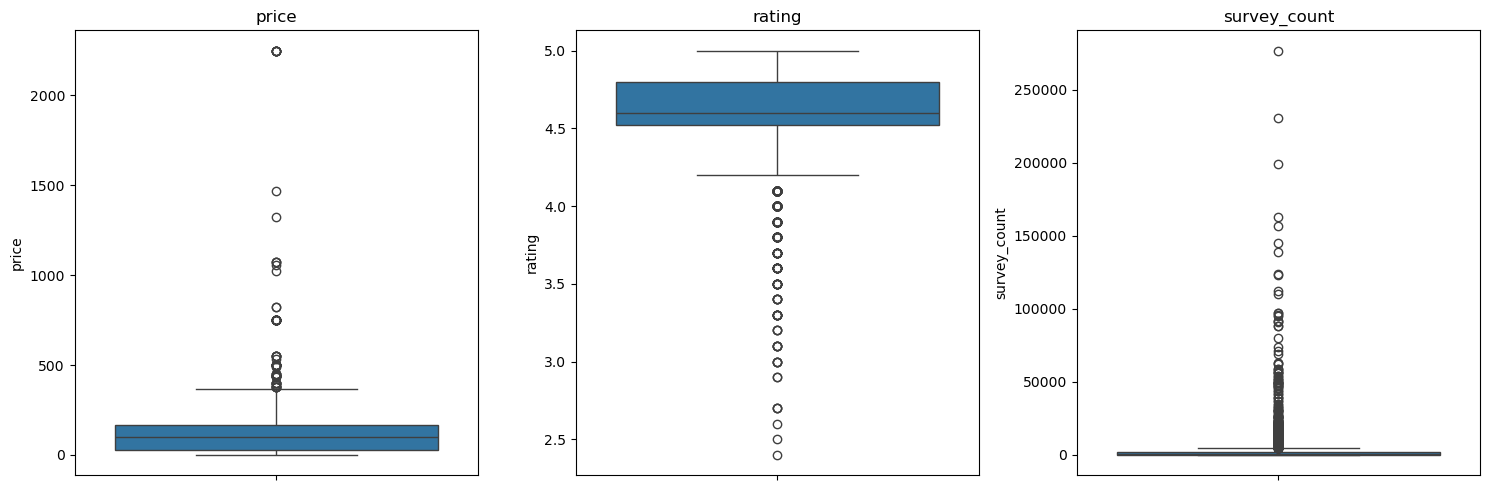

In [26]:
# Columns for which we want to view outliers
cols_to_plot = ['price', 'rating', 'survey_count']

# Create a figure with subplots for each column
plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, len(cols_to_plot), i + 1)
    sns.boxplot(data=merged_df, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

In [27]:
# Calculate Q1, Q3, and IQR for survey_count
Q1 = merged_df["survey_count"].quantile(0.25)
Q3 = merged_df["survey_count"].quantile(0.75)
IQR = Q3 - Q1

# Determine lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers in survey_count
num_outliers = merged_df[(merged_df["survey_count"] < lower_bound) | (merged_df["survey_count"] > upper_bound)].shape[0]

print("Number of outliers in survey_count:", num_outliers)

Number of outliers in survey_count: 433


In [28]:
# Compute z-scores for the survey_count column
survey_count_z = zscore(merged_df["survey_count"])

# Identify outliers with an absolute z-score greater than 3
outlier_mask = np.abs(survey_count_z) > 3
num_outliers_z = np.sum(outlier_mask)

print("Number of outliers in survey_count using z-score method:", num_outliers_z)

Number of outliers in survey_count using z-score method: 68


In [29]:
# For survey_count, use Z-score based clipping:
# Calculate the mean and standard deviation for survey_count
survey_mean = merged_df['survey_count'].mean()
survey_std = merged_df['survey_count'].std()

# Define the z-score threshold (3 in this case)
lower_bound_survey = survey_mean - 3 * survey_std
upper_bound_survey = survey_mean + 3 * survey_std

# Cap survey_count values outside the z-score threshold
merged_df['survey_count'] = merged_df['survey_count'].clip(lower_bound_survey, upper_bound_survey)

# Display summary statistics to verify the treatment
print("Survey_count after Z-score clipping:\n", merged_df['survey_count'].describe())


Survey_count after Z-score clipping:
 count     6010.000000
mean      1771.709280
std       4322.795315
min          1.000000
25%         38.000000
50%        416.000000
75%       1827.463174
max      31085.983336
Name: survey_count, dtype: float64


In [30]:
import numpy as np
import pandas as pd

# Function to cap outliers using IQR
def cap_outliers_IQR(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

# Apply IQR outlier handling to 'price' and 'rating'
merged_df['price'] = cap_outliers_IQR(merged_df['price'])
merged_df['rating'] = cap_outliers_IQR(merged_df['rating'])

print("Price after IQR winsorization:\n", merged_df['price'].describe())
print("Rating after IQR winsorization:\n", merged_df['rating'].describe())


Price after IQR winsorization:
 count    6010.000000
mean      104.738067
std        83.974482
min         0.000000
25%        28.577500
50%        97.980000
75%       166.768802
max       374.055756
Name: price, dtype: float64
Rating after IQR winsorization:
 count    6010.000000
mean        4.611988
std         0.204323
min         4.101068
25%         4.520427
50%         4.600000
75%         4.800000
max         5.000000
Name: rating, dtype: float64


In [31]:
merged_df

,url,course_name,rating,survey_count,Institution,Level,Associated_skills,price,duration_days
0,https://www.edx.org/learn/architecture-history...,mitx: a global history of architecture,4.900000,8.000000,MITx,Introductory,architectural history,149.000000,91.0
2,https://www.edx.org/learn/architecture/harvard...,harvardx: the architectural imagination,4.700000,144.000000,HarvardX,Introductory,"imagination, innovation, perspective (graphica...",249.000000,70.0
3,https://www.edx.org/learn/design/delft-univers...,delftx: ai in architectural design: introduction,4.520427,1827.463174,DelftX,Introductory,"architectural design, artificial intelligence,...",109.000000,56.0
5,https://www.edx.org/learn/architecture/the-uni...,utokyox: four facets of contemporary japanese ...,4.520427,1827.463174,UTokyoX,Intermediate,advertisement,119.000000,56.0
6,https://www.edx.org/learn/history/the-universi...,"utokyox: tokyo hillside, tokyo riverside: expl...",4.800000,5.000000,UTokyoX,Introductory,"lecturing, social development",59.000000,42.0
...,...,...,...,...,...,...,...,...,...
11668,https://stepik.org/course/121653/,unified state exam in mathematics 2023 basic l...,4.520427,1827.463174,not Institution,Beginner,,21.058496,56.0
11669,https://stepik.org/course/122618/,limits: instructions for use,4.700000,9.000000,not Institution,Beginner,the concept of the limit disclosure of uncerta...,21.169916,56.0
11670,https://stepik.org/course/122670/,derivatives: instructions for use,5.000000,4.000000,not Institution,Beginner,the concept of a derivative table of derivativ...,21.169916,56.0
11671,https://stepik.org/course/122678/,integrals: instructions for use,5.000000,3.000000,not Institution,Beginner,the concept of integral integration table inte...,21.169916,56.0


In [32]:
# Now, apply standard scaling to 'price', 'rating', and 'survey_count'
from sklearn.preprocessing import MinMaxScaler

# Specify the columns to scale
cols_to_scale = ['rating', 'survey_count']

# Initialize the MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit the scaler on the specified columns and transform them
merged_df[cols_to_scale] = minmax_scaler.fit_transform(merged_df[cols_to_scale])

# Verify the scaled values by printing the first few rows
print(merged_df[cols_to_scale].head())

     rating  survey_count
0  0.888757      0.000225
2  0.666271      0.004600
3  0.466508      0.058757
5  0.466508      0.058757
6  0.777514      0.000129


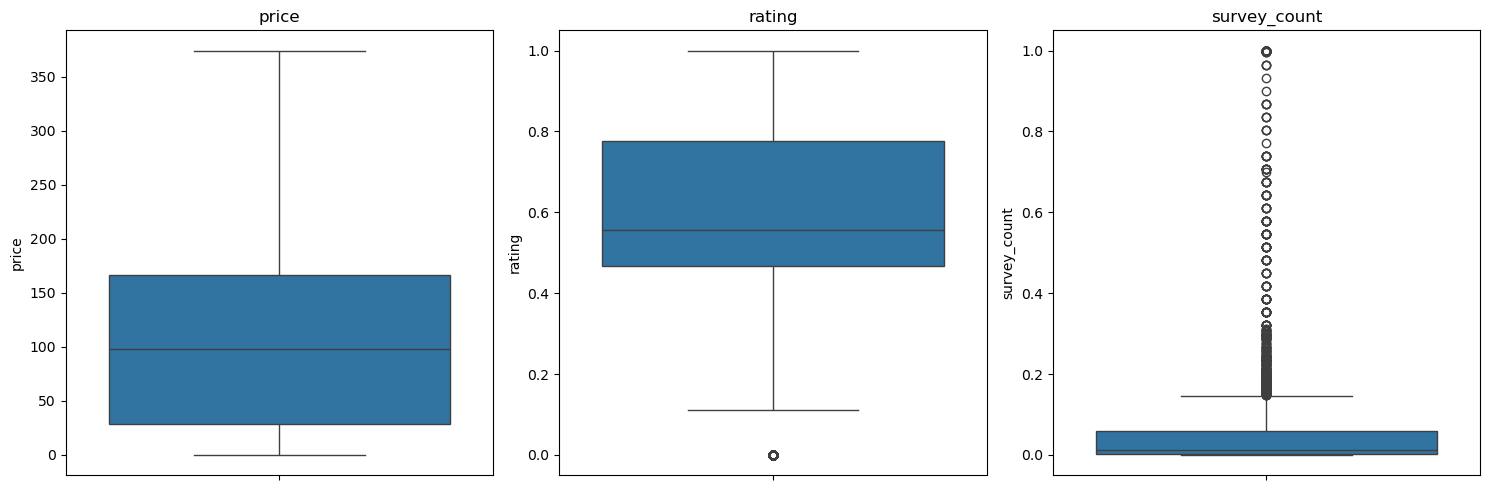

In [33]:
cols_to_plot = ['price', 'rating', 'survey_count']

# Create a figure with subplots for each column
plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, len(cols_to_plot), i + 1)
    sns.boxplot(data=merged_df, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

In [34]:
# Drop rows where 'Associated_skills' is exactly an empty string
merged_df = merged_df[merged_df["Associated_skills"] != '']

merged_df.reset_index(drop=True, inplace=True)

In [35]:
merged_df

,url,course_name,rating,survey_count,Institution,Level,Associated_skills,price,duration_days
0,https://www.edx.org/learn/architecture-history...,mitx: a global history of architecture,0.888757,0.000225,MITx,Introductory,architectural history,149.000000,91.0
1,https://www.edx.org/learn/architecture/harvard...,harvardx: the architectural imagination,0.666271,0.004600,HarvardX,Introductory,"imagination, innovation, perspective (graphica...",249.000000,70.0
2,https://www.edx.org/learn/design/delft-univers...,delftx: ai in architectural design: introduction,0.466508,0.058757,DelftX,Introductory,"architectural design, artificial intelligence,...",109.000000,56.0
3,https://www.edx.org/learn/architecture/the-uni...,utokyox: four facets of contemporary japanese ...,0.466508,0.058757,UTokyoX,Intermediate,advertisement,119.000000,56.0
4,https://www.edx.org/learn/history/the-universi...,"utokyox: tokyo hillside, tokyo riverside: expl...",0.777514,0.000129,UTokyoX,Introductory,"lecturing, social development",59.000000,42.0
...,...,...,...,...,...,...,...,...,...
5919,https://stepik.org/course/121057/,"use informatics 2024 - tasks 1-23 ""the first p...",1.000000,0.000064,not Institution,Beginner,learn to think logically and solve tasks analy...,24.401114,56.0
5920,https://stepik.org/course/122618/,limits: instructions for use,0.666271,0.000257,not Institution,Beginner,the concept of the limit disclosure of uncerta...,21.169916,56.0
5921,https://stepik.org/course/122670/,derivatives: instructions for use,1.000000,0.000097,not Institution,Beginner,the concept of a derivative table of derivativ...,21.169916,56.0
5922,https://stepik.org/course/122678/,integrals: instructions for use,1.000000,0.000064,not Institution,Beginner,the concept of integral integration table inte...,21.169916,56.0


In [36]:
merged_df.to_csv("merged_df.csv", index=False)

In [85]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Предполагается, что DataFrame merged_df уже существует и содержит нужные столбцы:
# 'course_name', 'Institution', 'Level', 'Associated_skills', 'price', 'duration_days', 'rating', 'survey_count'

# Создаем копию DataFrame для избежания предупреждений
merged_df = merged_df.copy()

# Создаем объединённый текстовой столбец для поиска, приводим текст к нижнему регистру
text_cols = ['course_name', 'Institution', 'Level', 'Associated_skills']
merged_df.loc[:, 'combined_text'] = merged_df[text_cols].fillna('').agg(' '.join, axis=1).str.lower()

# Инициализируем и обучаем TfidfVectorizer на объединённом тексте
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df['combined_text'])

def search_courses(query, levels=None, max_price=None, max_duration=None):
    """
    Поиск курсов по текстовому запросу с использованием TF‑IDF.
    Дополнительно выполняется фильтрация по:
      - уровню (levels): список строк (например, ['beginner', 'intermediate']),
      - максимальной цене (max_price),
      - максимальной длительности в днях (max_duration).
    
    Возвращает DataFrame с результатами, отсортированными по косинусному сходству,
    рейтингу и количеству отзывов.
    """
    # Векторизуем запрос (приводим к нижнему регистру)
    query_vec = tfidf_vectorizer.transform([query.lower()])
    similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()
    
    # Копируем DataFrame для поиска и добавляем столбец со сходством
    df_search = merged_df.copy()
    df_search['similarity'] = similarities
    
    # Оставляем только те курсы, у которых сходство больше 0
    result = df_search[df_search['similarity'] > 0]
    
    # Фильтрация по уровням, если заданы (сравнение в нижнем регистре)
    if levels:
        result = result[result['Level'].str.lower().isin(levels)]
    
    # Фильтрация по максимальной цене
    if max_price is not None:
        result = result[result['price'] <= max_price]
        
    # Фильтрация по максимальной длительности
    if max_duration is not None:
        result = result[result['duration_days'] <= max_duration]
    
    # Сортировка: сначала по сходству (по убыванию), затем по рейтингу и количеству отзывов
    result = result.sort_values(by=['similarity', 'rating', 'survey_count'], ascending=False)
    return result

# Получаем входные данные от пользователя
query_input = input("Введите поисковый запрос: ").strip()
levels_input = input("Введите уровни (через запятую, например, Beginner,Intermediate) или оставьте пустым: ").strip().lower()
if levels_input:
    levels_list = [lvl.strip() for lvl in levels_input.split(',')]
else:
    levels_list = None

max_price_input = input("Введите максимальную цену или оставьте пустым: ").strip()
if max_price_input:
    max_price = float(max_price_input)
else:
    max_price = None

max_duration_input = input("Введите максимальную длительность (в днях) или оставьте пустым: ").strip()
if max_duration_input:
    max_duration = float(max_duration_input)
else:
    max_duration = None

# Выполняем поиск с заданными критериями
results = search_courses(query_input, levels=levels_list, max_price=max_price, max_duration=max_duration)

# Выводим результаты
print("\nРезультаты поиска:")
print(results[['url', 'course_name', 'Level', 'rating', 'survey_count', 'price', 'duration_days', 'similarity']].head())


Введите поисковый запрос:  sql
Введите уровни (через запятую, например, Beginner,Intermediate) или оставьте пустым:  Beginner
Введите максимальную цену или оставьте пустым:  100
Введите максимальную длительность (в днях) или оставьте пустым:  10



Результаты поиска:
                                                    url  \
3978  https://www.coursera.org/projects/googlecloud-...   
3305  https://www.coursera.org/projects/basic-sql-sy...   
5119  https://www.coursera.org/projects/snowflake-fo...   

                                            course_name     Level    rating  \
3978     introduction to sql for bigquery and cloud sql  Beginner  0.443785   
3305                     understanding basic sql syntax  Beginner  0.666271   
5119  snowflake for beginners: make your first snows...  Beginner  0.221298   

      survey_count     price  duration_days  similarity  
3978      0.002863  0.136083       0.083333    0.478572  
3305      0.008622  0.136083       0.083333    0.448911  
5119      0.001287  0.136083       0.083333    0.161523  
